<a href="https://colab.research.google.com/github/evaldoflorestal/RedeNeural_Previsao_Diametros/blob/main/Previs%C3%A3o_Diametros_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de crescimento de diâmetros em Tectona grandis utilizando Redes Neurais

Neste estudo, utilizamos o aprendizado de máquina, especificamente Redes Neurais, para desenvolver um algoritmo capaz de prever o diâmetro de uma árvore com base na idade desejada. Os dados utilizados para aprendizagem foram coletados a partir de levantamentos consecutivos de um inventário florestal da espécie Tectona grandis (teca), utilizando um material genético denominado CloneX, com aproximadamente 17 anos de idade.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Para baixar a planilha de dados, poderá baixar com o seguinte link:
[Planilha de dados - levantamentos em campo](https://docs.google.com/spreadsheets/d/1USkcVRCxx88PGOsHPwev6O7A85dspi6E/edit?usp=share_link&ouid=117422663938678813166&rtpof=true&sd=true)

Como não faz parte de nosso objetivo realizar análise dos dados e assim verificar erros de entrada, os mesmos já foram tratados previamente. 

Consequentemente importamos abaixo a nossa planilha em excel para visualização dos dados.

In [3]:
inventario = pd.read_excel('/content/Inventario_Clone_Teca.xlsx')
inventario

,Cod.Talhao,Seq.Medicao,Idade_anos,Material,Especie,Arv_parcela,Arv_por_ha,DAP_medio_cm,Altura_media_m,Altura Dominante (m),Area_Basal_m2,Volume_m3_ha
0,T_ClonX,1,1.4,CloneX,Teca,103,825,6.4,5.5,6.2,2.7,6.8
1,T_ClonX,2,2.7,CloneX,Teca,103,825,13.1,9.4,10.3,11.2,48.0
2,T_ClonX,3,3.5,CloneX,Teca,77,617,16.5,12.6,13.7,13.2,75.3
3,T_ClonX,4,4.6,CloneX,Teca,77,617,19.0,14.6,15.3,17.5,115.2
4,T_ClonX,5,5.4,CloneX,Teca,53,425,22.2,16.6,17.4,16.5,123.3
5,T_ClonX,6,6.4,CloneX,Teca,54,433,25.0,19.0,19.9,21.2,181.2
6,T_ClonX,7,7.4,CloneX,Teca,41,329,27.5,20.3,21.3,19.6,178.9
7,T_ClonX,8,8.4,CloneX,Teca,41,329,30.2,21.7,22.6,23.6,229.9
8,T_ClonX,9,9.4,CloneX,Teca,34,272,32.4,22.5,23.2,22.4,227.6
9,T_ClonX,10,10.4,CloneX,Teca,34,272,34.7,23.1,23.9,25.7,266.9


#Plotando o crescimento em Diâmetros

Primeiro passo é definir o tamanho de saída e fonte. Por fim, passamos quais informações de nosso interesse que constam em nosso dataframe serão plotadas no gráfico.

In [75]:
mpl.rcParams['figure.figsize'] = [10,6]
mpl.rcParams['font.size'] = 22

<Axes: xlabel='Idade_anos', ylabel='DAP_medio_cm'>

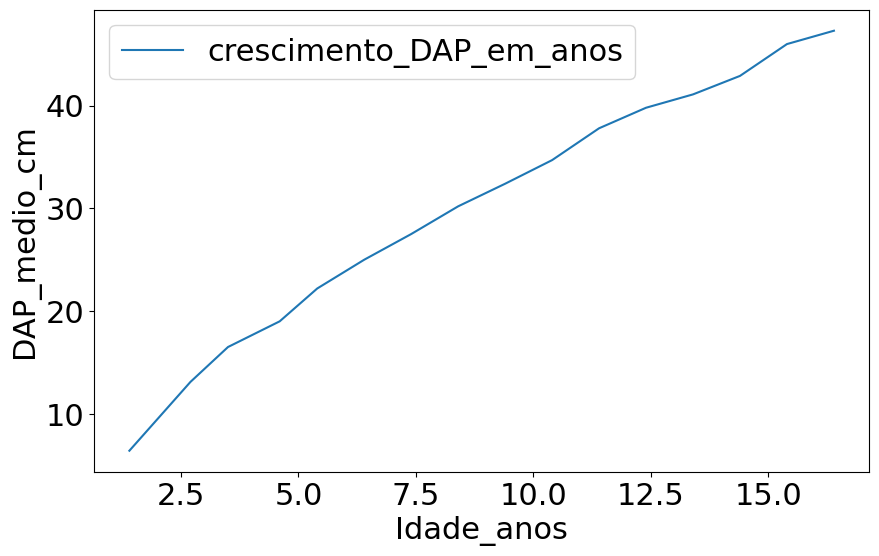

In [76]:
sns.lineplot(x='Idade_anos', y='DAP_medio_cm', data=inventario, label='crescimento_DAP_em_anos')

Importante definir corretamente a dimensão de entrada (input_dim) uma vez que no nosso caso, estamos inserindo como entrada de informação a "idade", ou seja, apenas uma informação. Sendo assim o modelo deve seguir (input_dim=1). Devemos atentar que na ultima camada do modelo, também devemos inserir = 1 (pois a saída vai ser de apenas uma dimensão).

In [279]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense

model = Sequential()

model.add(Dense(75, input_dim=1, activation='relu'))
model.add(Dense(55, activation='relu'))
model.add(Dense(25, activation='relu'))
#model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear')) #Ter cuidado aqui, pois a ultima camada de saída deve ser igual a dimensão solicitada, no caso = 1

#Testes de otimizadores e perdas em nosso modelo

Abaixo foram testados os otimizadores `Adam`, `rmsprop`, `sgd` e suas combinações com os parâmetros de perdas `mean_squared_error` (Erro Quadrático Médio) e `mean_absolute_error` (Erro Absoluto Médio).

In [293]:
model.compile(loss='mean_squared_error', optimizer= 'Adam')
#model.compile(loss='mean_squared_error', optimizer= 'rmsprop')
#model.compile(loss='mean_absolute_error', optimizer='rmsprop')
#model.compile(loss='mean_squared_error', optimizer='sgd')
#model.compile(loss='mean_absolute_error', optimizer='sgd')
#model.compile(loss='mean_absolute_error', optimizer='Adam')

Vamos separar o modelo com dados de treino (características e rótulos)

As **características** são os dados de entrada do modelo e correspondem às colunas do nosso dataframe que contêm informações sobre cada amostra. No nosso caso, as características seriam as colunas com a "idade".

Os **rótulos** são os dados de saída do modelo e correspondem à coluna do nosso dataframe que contém a informação que estamos tentando prever, no caso o "diâmetro" das árvores (DAP_medio_cm).

In [294]:
X = inventario['Idade_anos'].values.reshape(-1, 1) # meus dados de treino (características)
y = inventario['DAP_medio_cm'].values.reshape(-1, 1) # meus dados de treino (rótulos)

Para separar os dados em conjuntos de treino e teste com uma proporção de 80/20, podemos usar a função `train_test_split` do `scikit-learn`. Essa função divide os dados em dois conjuntos de maneira aleatória, garantindo que a proporção entre os conjuntos seja a especificada.

In [295]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Verificando o tamanho dos conjuntos de treino e teste
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (12, 1)
X_test shape: (4, 1)
y_train shape: (12, 1)
y_test shape: (4, 1)


O tamanho do lote (batch_size) é um hiperparâmetro que controla o número de amostras usadas para calcular a atualização dos pesos em cada iteração do treinamento. Um tamanho de lote pequeno (como 2) significa que o modelo é atualizado com mais frequência, mas cada atualização é baseada em menos informações.

Usar um tamanho de lote pequeno pode ter vantagens e desvantagens. Por um lado, pode ajudar o modelo a escapar de mínimos locais e encontrar melhores soluções. Por outro lado, pode tornar o treinamento mais lento e instável, pois cada atualização é baseada em menos informações.

Não há uma resposta definitiva sobre qual é o melhor tamanho de lote para um determinado problema. É comum experimentar diferentes valores de tamanho de lote para encontrar o melhor compromisso entre velocidade de treinamento e qualidade da solução.

podemos tentar treinar o modelo com diferentes valores de batch_size (por exemplo, 1, 2, 4, 8, 16, …) e comparar o desempenho do modelo nos dados de teste para ver qual valor funciona melhor para o problema específico.

Após vários testes, encontramos um bom resultado final após utilizar `epochs=800` e `batch_size=120` para o nosso modelo.

In [296]:
history = model.fit(X_train, y_train, epochs=800, batch_size=120)

Epoch 1/800
1/1 [==============================] - 1s 770ms/step - loss: 2.7034
Epoch 2/800
1/1 [==============================] - 0s 10ms/step - loss: 3.0217
Epoch 3/800
1/1 [==============================] - 0s 8ms/step - loss: 2.6707
Epoch 4/800
1/1 [==============================] - 0s 10ms/step - loss: 2.4622
Epoch 5/800
1/1 [==============================] - 0s 8ms/step - loss: 2.6526
Epoch 6/800
1/1 [==============================] - 0s 7ms/step - loss: 2.6353
Epoch 7/800
1/1 [==============================] - 0s 9ms/step - loss: 2.4501
Epoch 8/800
1/1 [==============================] - 0s 10ms/step - loss: 2.4105
Epoch 9/800
1/1 [==============================] - 0s 17ms/step - loss: 2.4991
Epoch 10/800
1/1 [==============================] - 0s 10ms/step - loss: 2.5023
Epoch 11/800
1/1 [==============================] - 0s 7ms/step - loss: 2.4041
Epoch 12/800
1/1 [==============================] - 0s 11ms/step - loss: 2.3438
Epoch 13/800
1/1 [==============================] - 0

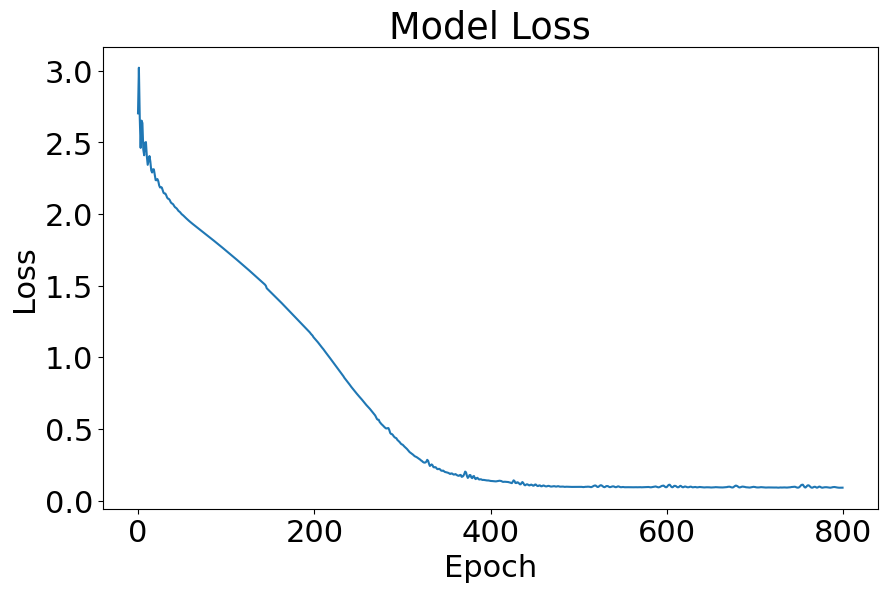

In [297]:
loss = history.history['loss']
plt.plot(loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Depois de treinar o modelo com os dados de treino, podemos usar o método predict do modelo para fazer previsões com os dados de teste.

In [298]:
X_test = inventario['Idade_anos'].values # Nossos dados de teste (características)
y_test = inventario['DAP_medio_cm'].values # Nossos dados de teste (rótulos)

y_pred = model.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [299]:
y_pred

array([[ 6.401169],
       [13.101709],
       [16.467844],
       [19.631077],
       [21.931608],
       [24.807278],
       [27.682945],
       [30.416523],
       [32.786697],
       [35.15688 ],
       [37.527054],
       [39.527824],
       [41.502995],
       [43.478172],
       [45.453346],
       [47.428516]], dtype=float32)

In [300]:
y_pred = model.predict(X_test)
print('y_pred shape:', y_pred.shape)

1/1 [==============================] - 0s 28ms/step
y_pred shape: (16, 1)


#Plotando dados previstos e reais

Aqui criamos um gráfico para fins de avaliar nosso modelo de previsão com os dados reais levantados em campo

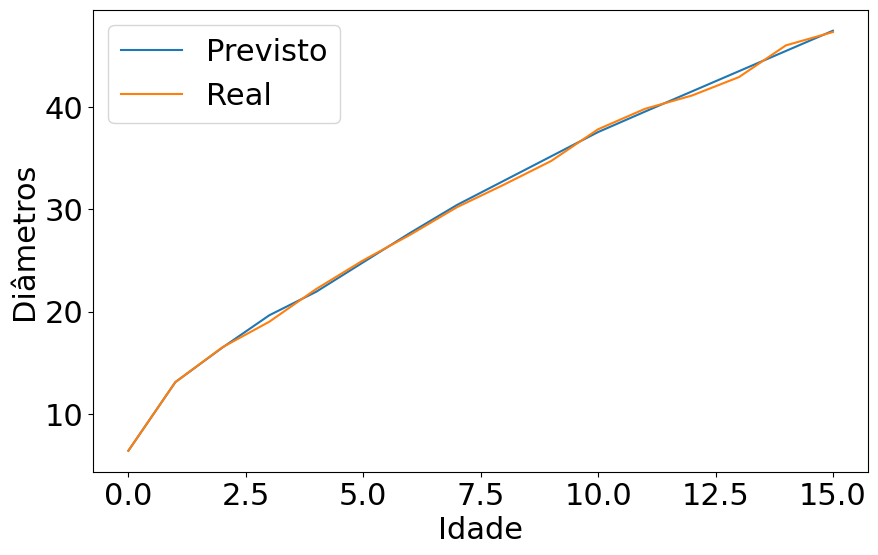

In [301]:
# Dados de diâmetros reais
diam_reais = inventario['DAP_medio_cm'].values

# Plotando os dados
plt.plot(y_pred, label='Previsto')
plt.plot(diam_reais, label='Real')
plt.ylabel('Diâmetros')
plt.xlabel('Idade')
plt.legend()
plt.show()

Abaixo vamos conferir se o X-test e o Y_test tem as mesmas dimensões.

In [302]:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (16,)
y_test shape: (16,)


Após conferir as dimensões vamos avaliar o desempenho do modelo comparando as previsões y_pred com os rótulos verdadeiros y_test. Existem várias métricas que podemos usar para fazer essa comparação, dependendo do tipo de problema que estamos tentando resolver. Em nosso caso específico, estamos tentando prever o crescimento em diâmetro das árvores com base na idade, um problema de regressão, algumas métricas comuns que podemos usar são o erro quadrático médio (MSE) e o coeficiente de determinação (R²).

In [303]:
from sklearn.metrics import mean_squared_error, r2_score


In [304]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R²:', r2)

1/1 [==============================] - 0s 20ms/step
MSE: 0.11923193069905189
R²: 0.9991586218288426


O resultado mostra que o erro quadrático médio (MSE) do modelo nos dados de teste é de aproximadamente 0.119 e o coeficiente de determinação (R²) é de aproximadamente 0.999. O MSE mede o erro médio do modelo nas previsões e quanto menor, melhor. O R² mede a proporção da variância nos dados que é explicada pelo modelo e varia entre 0 e 1, com valores mais próximos de 1 indicando um melhor ajuste do modelo aos dados.

Com base nesses resultados, parece que o modelo está se saindo bem nos dados de teste e é capaz de prever o crescimento em diâmetro das árvores com base na idade com um alto grau de precisão.

No entanto, é importante lembrar que essas métricas são apenas uma estimativa do desempenho do modelo em novos dados e podem variar dependendo da qualidade e representatividade dos dados de teste. Além disso, podemos experimentar diferentes arquiteturas de modelo, funções de perda e otimizadores para ver se consegue melhorar ainda mais o desempenho do modelo.

Agora vamos usar o modelo treinado para fazer previsões para uma única idade. Para fazer isso, precisamos criar um array com a forma correta (uma amostra com uma característica) e passá-lo para o método predict do modelo.

In [305]:
import numpy as np

idade = 16.4 #Inserimos uma idade conhecida em levantamento para fins de comparação
x = np.array([[idade]])

y = model.predict(x)
crescimento_diametro = y[0][0]

print(f'O crescimento em diâmetro previsto para uma árvore com {idade} anos é {crescimento_diametro:.2f} cm')

1/1 [==============================] - 0s 61ms/step
O crescimento em diâmetro previsto para uma árvore com 16.4 anos é 47.43 cm


Neste exemplo acima, criamos um array x com a forma (1, 1) que contém uma única amostra com uma única característica (a idade da árvore). Em seguida, estamos passando esse array para o método predict do modelo para fazer a previsão. O resultado é um array y com a forma (1, 1) que contém a previsão do modelo para o crescimento em diâmetro da árvore.

Finalmente, estamos acessando o primeiro elemento do array y para obter a previsão do modelo e armazená-la na variável crescimento_diametro. Com isso, podemos usar essa variável para ver a previsão do modelo para o crescimento em diâmetro de uma árvore com a idade especificada.

Observe que este é apenas um exemplo e podemos ajustar o código para fazer previsões para diferentes idades ou para formatar a saída de maneira diferente.

#Conclusão

Após testar diferentes funções de ativação e otimizadores em nosso modelo de previsão de diâmetros de árvores, descobrimos que a combinação de `loss='mean_squared_error'` e `optimizer='Adam'` produziu os melhores resultados. Comparando as previsões do modelo com os dados reais observados em campo, verificamos que essa configuração minimizou o erro quadrático médio e forneceu as estimativas mais precisas para o nosso conjunto de dados, conforme contatado em gráfico (Previsto VS Real).


Sendo assim é possível afirmar que podemos realizar o mesmo treinamento para prever outras informações em nossa planilha inicial, tais como: Alturas das árvores, Volume em m³ por hectare e entre outras informações.